# FODO optics

This will demonstrate how to scan symmetrically and asymetrically the quadruople strengths in a standard FODO lattice.

Later we will optimize for particular average beta function.

Finally, we will track a beam and gather statistics from the particles.

In [1]:
from pytao import Tao
import numpy as np
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format = 'retina'

In [2]:
tao = Tao('-init $ACC_ROOT_DIR/tao/examples/fodo/tao.init -lat $ACC_ROOT_DIR/tao/examples/fodo/fodo.bmad -noplot')

In [3]:
def add_info(d):
    twiss1 = tao.ele_twiss('q1')
    twiss2 = tao.ele_twiss('q2')

    d['mean_beta_a'] = (twiss1['beta_a'] +  twiss2['beta_a'])/2
    d['mean_beta_b'] = (twiss1['beta_b'] +  twiss2['beta_b'])/2
    d['phi_a'] = twiss2['phi_a']
    d['phi_b'] = twiss2['phi_b']
    return d

In [4]:
%%tao
sho lat

-------------------------
Tao> sho lat
# Values shown are for the Exit End of each Element:
# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit   Track
#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]   State
      0  BEGINNING Beginning_Ele         0.000     ---    0.67   0.000   0.00   0.000    3.22   0.000   0.00   0.000   Alive
      1  P1        Pipe                  0.900   0.900    3.22   0.105   0.00   0.000    0.67   0.105   0.00   0.000   Alive
      2  Q1        Quadrupole            1.000   0.100    3.22   0.110   0.00   0.000    0.67   0.129   0.00   0.000   Alive
      3  P1        Pipe                  1.900   0.900    0.67   0.215   0.00   0.000    3.22   0.235   0.00   0.000   Alive
      4  Q2        Quadrupole            2.000   0.100    0.67   0.239   0.00   0.000    3.22   0.239   0.00   0.000   Alive
      5  END       Marker        

## Symmetric FODO

In [5]:
def set_kx(k1):
    cmds = [f'set ele q1 k1 = {k1}',
            f'set ele q2 k1 = {-k1}']
    
    d = {}
    try:
        tao.cmds(cmds)
        tao.cmd('set global lattice_calc_on = T')
        d['good'] = True
        add_info(d)
    except:
        d['good'] = False
    
    
    
    return d
x = set_kx(1.4142136E+01)
KEYS = x.keys()
x

{'good': True,
 'mean_beta_a': 1.9442223177869156,
 'mean_beta_b': 1.9442223177869151,
 'phi_a': 1.50388821541239,
 'phi_b': 1.5038882154124}

In [6]:
# Scan k1
n1 = 20
qvec1 = np.linspace(1, 25, n1)

RESULTS = []

#tao.cmd('set global plot_on = F')
for k in qvec1:
    res = set_kx(k)
    RESULTS.append(res)    
#tao.cmd('set global plot_on = T')

In [7]:
# Reshape data
DAT = {}
for key in KEYS:
    print(key)
    x = []
    for res in RESULTS:
        if key in res:
            x.append(res[key])
        else:
            x.append(np.nan)
    DAT[key] = np.array(x)            

good
mean_beta_a
mean_beta_b
phi_a
phi_b


In [8]:
DAT.keys()

dict_keys(['good', 'mean_beta_a', 'mean_beta_b', 'phi_a', 'phi_b'])

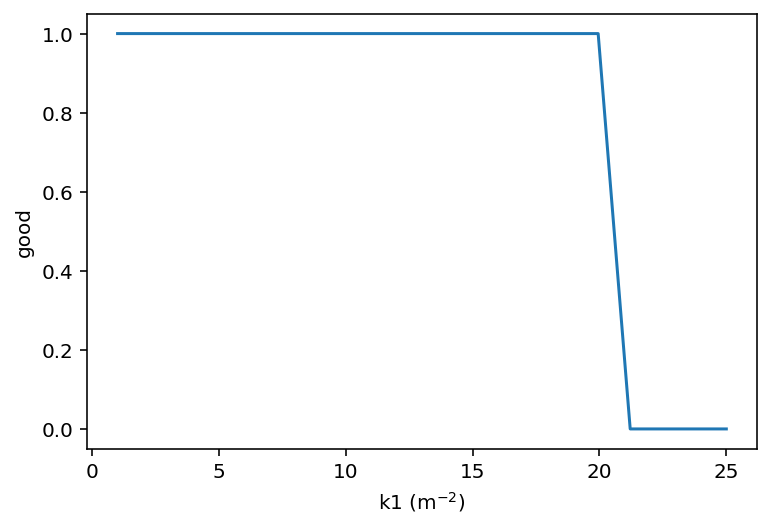

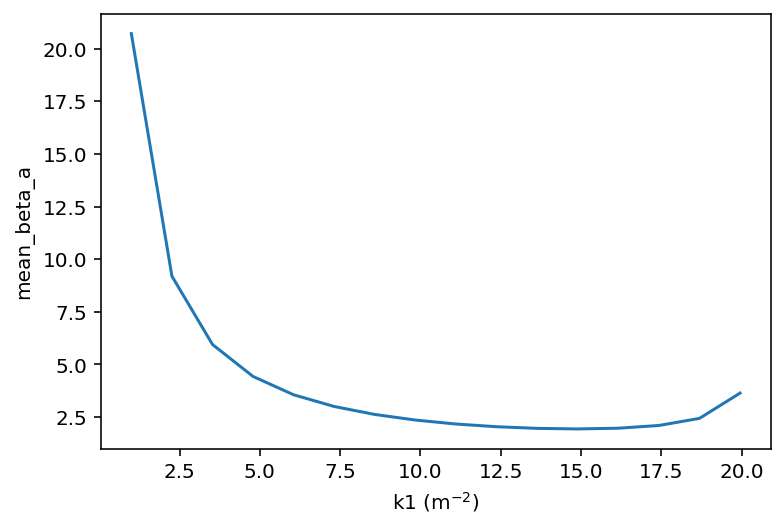

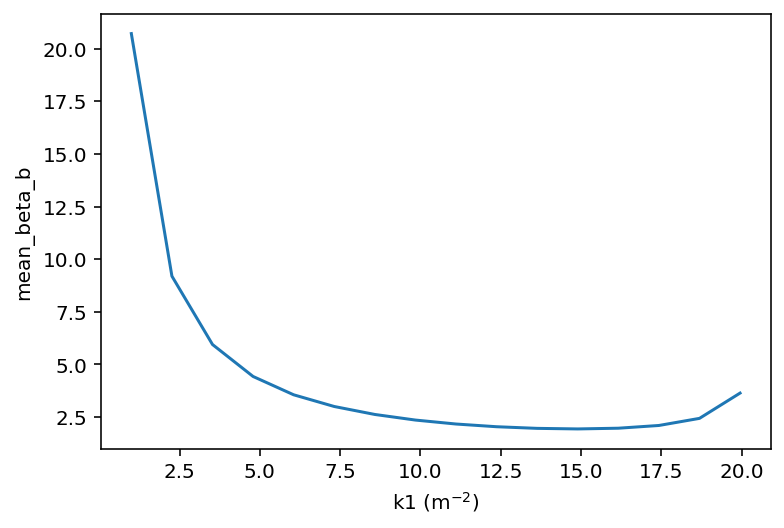

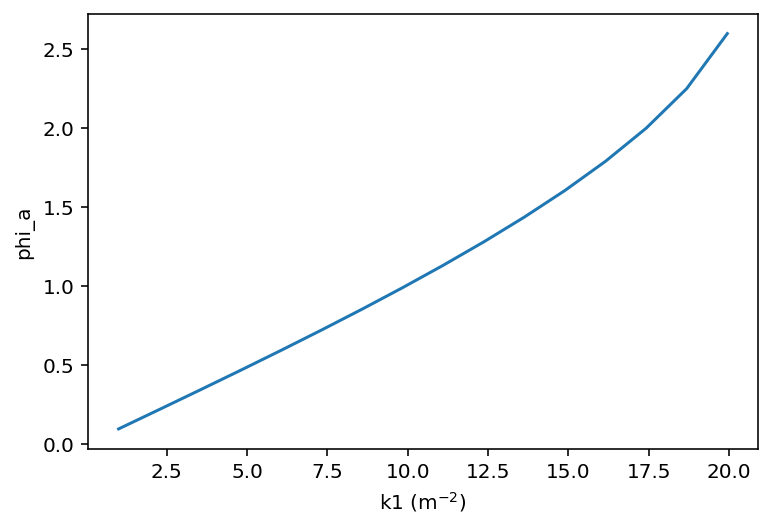

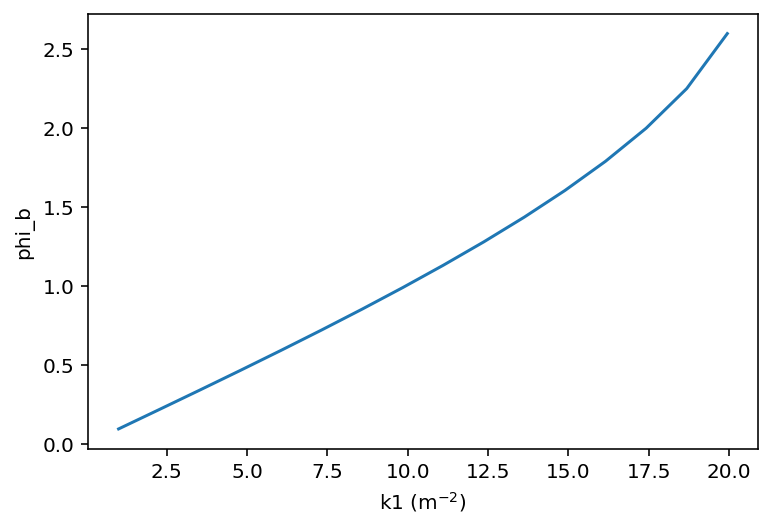

In [9]:
for key in KEYS:
    plt.plot(qvec1, DAT[key])
    plt.ylabel(key)
    plt.xlabel(r'k1 (m$^{-2}$)')
    plt.show()

# Asymmetric FODO

Scan k1 for each quad

In [10]:
def set_k(k1, k2):
    cmds = [f'set ele q1 k1 = {k1}', f'set ele q2 k1 = {-k2}']
    
    d = {}
    try:
        tao.cmds(cmds)
        tao.cmd('set global lattice_calc_on = T')
        d['good'] = True
        add_info(d)
    except:
        d['good'] = False
    
    
    
    return d
x = set_k(1.4142136E+01, 1.4142136E+01)
KEYS = x.keys()
x

{'good': True,
 'mean_beta_a': 1.9442223177869156,
 'mean_beta_b': 1.9442223177869151,
 'phi_a': 1.50388821541239,
 'phi_b': 1.5038882154124}

In [11]:
set_k(1,1)

{'good': True,
 'mean_beta_a': 20.723056201983,
 'mean_beta_b': 20.7230562019829,
 'phi_a': 0.0966467384116863,
 'phi_b': 0.0966467384116869}

In [12]:
n1 = 50
n2 = 60
qvec1 = np.linspace(1, 15, n1)
qvec2 = np.linspace(1, 15, n2)
K1, K2 = np.meshgrid(qvec1, qvec2, indexing='ij')

fK1 = K1.flatten()
fK2 = K2.flatten()

In [13]:
%%time
# Make data

tao.cmd('set global plot_on = F')

RESULTS = []
for k1, k2 in zip(fK1, fK2):
    res = set_k(k1, k2)
#    print(res)
    RESULTS.append(res)

    
#tao.cmd('set global plot_on = T')

CPU times: user 3.41 s, sys: 2.02 s, total: 5.43 s
Wall time: 5.51 s


In [14]:
# Reshape data
DAT = {}
for key in RESULTS[0]:
    print(key)
    x = []
    for res in RESULTS:
        if key in res:
            x.append(res[key])
        else:
            x.append(np.nan)
        
    DAT[key] = np.array(x).reshape(n1, n2)

good
mean_beta_a
mean_beta_b
phi_a
phi_b


# Plots

In [15]:
NICE = {}
NICE['mean_beta_a'] = r'$<\beta_x>$'
NICE['mean_beta_b'] = r'$<\beta_y>$'
def nice(key):
    if key in NICE:
        return NICE[key]
    return key

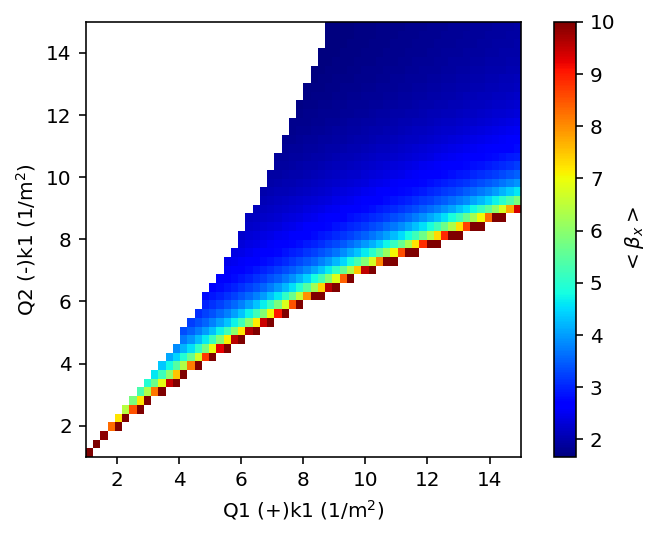

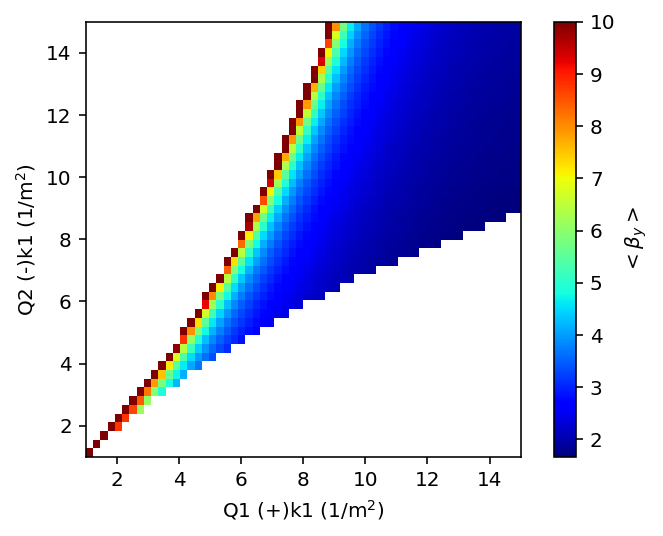

In [16]:
#fig, ax = plt.subplots(figsize=(10,8))

def plot1(key):
    plt.imshow(DAT[key], origin='lower',
               extent=[qvec1.min(), qvec1.max(), qvec2.min(), qvec2.max()], 
               cmap='jet',
              vmax = 10)
    plt.xlabel('Q1 (+)k1 (1/m$^2$)')
    plt.ylabel('Q2 (-)k1 (1/m$^2$)')
    plt.colorbar(label=nice(key))
    plt.show()
plot1('mean_beta_a')
plot1('mean_beta_b')

# Optimize for some special beta functions

In [17]:
def optimize(beta_a, beta_b):
    cmds = f"""
alias setbetas
veto var *
set lattice model=design
veto dat *
use dat fodo.betas[1,2]
set dat fodo.betas[1]|meas={beta_a}
set dat fodo.betas[2]|meas={beta_b}
use var quad
run
show var -bmad -good
    """
    lines = tao.cmds(cmds.split('\n'), suppress_lattice_calc=False, suppress_plotting=False, raises=False)
    
    # Twiss at Q1
    T = tao.ele_twiss('Q1')
    return T
optimize(10, 20)    

{'mode_flip': False,
 'beta_a': 19.8980601747807,
 'alpha_a': 20.8824960367291,
 'gamma_a': 21.9658919957419,
 'phi_a': 0.688888454799641,
 'eta_a': 0.0,
 'etap_a': 0.0,
 'beta_b': 8.56179989648929,
 'alpha_b': -8.68869255014027,
 'gamma_b': 8.93426372441017,
 'phi_b': 0.0669702646497163,
 'eta_b': 0.0,
 'etap_b': 0.0,
 'eta_x': 0.0,
 'etap_x': 0.0,
 'eta_y': 0.0,
 'etap_y': 0.0}

In [18]:
# Check merit
tao.merit()

['  2.80064554015184E-23']

In [19]:
# Check that the optimization worked
average_beta_a = tao.data('fodo', 'betas', dat_index=1)['model_value']
average_beta_b = tao.data('fodo', 'betas', dat_index=2)['model_value']
average_beta_a, average_beta_b

(9.99999999999998, 20.0000000000017)

In [20]:
# These are the K
kq1 = tao.ele_gen_attribs('Q1')['K1']
kq2 = tao.ele_gen_attribs('Q2')['K1']
kq1, kq2

(20.6297896339797, -10.5500557883925)

# Alternative method: alias

A 'simple' Tao alias can be useful when running on the command line.


In [21]:
tao.cmd('alias setbetas veto var *;veto dat *;use dat fodo.betas[1,2];set dat fodo.betas[1]|meas=[[1]];set dat fodo.betas[2]|meas=[[2]];use var quad;run;show var -bmad -good')
#tao.cmd('call SetBetas.tao', raises=False)

lines = tao.cmd('setbetas 40 25', raises=False)
lines[-3:];
tao.merit()

['  8.36381886151526E-24']

In [22]:
T = tao.ele_twiss('Q1')
T

{'mode_flip': False,
 'beta_a': 79.7708116314711,
 'alpha_a': 83.9897718056194,
 'gamma_a': 88.4444024532975,
 'phi_a': 0.213283369019615,
 'eta_a': 0.0,
 'etap_a': 0.0,
 'beta_b': 10.6890160749888,
 'alpha_b': -10.8776594910373,
 'gamma_b': 11.1631861310564,
 'phi_b': 0.0536009562200217,
 'eta_b': 0.0,
 'etap_b': 0.0,
 'eta_x': 0.0,
 'etap_x': 0.0,
 'eta_y': 0.0,
 'etap_y': 0.0}

# Beam tracking 

Here we will make a new lattice with 10 cells that calls the single fodo lattice.

In [23]:
from pytao.misc.markers import make_markers

In [24]:
?make_markers

Signature: make_markers(slist, filename=None, ref=None)
Docstring:
Makes markers relative to ref ele.

If filename is given, the lines will be written to ta file. 
File:      ~/Code/GitHub/pytao/pytao/misc/markers.py
Type:      function


In [25]:
smax = 20.0 # m

# Alternatively, if the lattice were already loaded
#smax = tao.lat_list('*', who='ele.s').max()

slist = np.linspace(0, smax, 200)

make_markers(slist, filename='markers.bmad');

smax

20.0

In [26]:
# Make a lattice and write to a local file

latfile = os.path.join(os.getcwd(), 'fodo10.bmad')

LAT2 = f"""

call, file = $ACC_ROOT_DIR/tao/examples/fodo/fodo.bmad
call, file = markers.bmad

Q1[k1] = {kq1}
Q2[k1] = {kq2}

lat: line = (10*fodo1)

use, lat

"""
open(latfile, 'w').write(LAT2)

172

In [27]:
# Run with this lattice
tao = Tao(f'-init $ACC_ROOT_DIR/tao/examples/fodo/tao.init -lat {latfile} -noplot')

In [28]:
# Toggle the beam on and off
tao.cmd('set beam_init n_particle = 1000')
tao.cmd('set global track_type = beam;set global track_type = single')

['',
 'Tao: set global track_type = beam',
 '',
 'Tao: set global track_type = single']

## Get particles 

In [29]:
import h5py
from pmd_beamphysics import ParticleGroup, particle_paths

with h5py.File('beam_dump.h5', 'r') as h5:
    pp = particle_paths(h5)
    Plist = [ParticleGroup(h5[g]) for g in pp]
    

## Pretty plot

Traces can be made by gathering the coordinate arrays

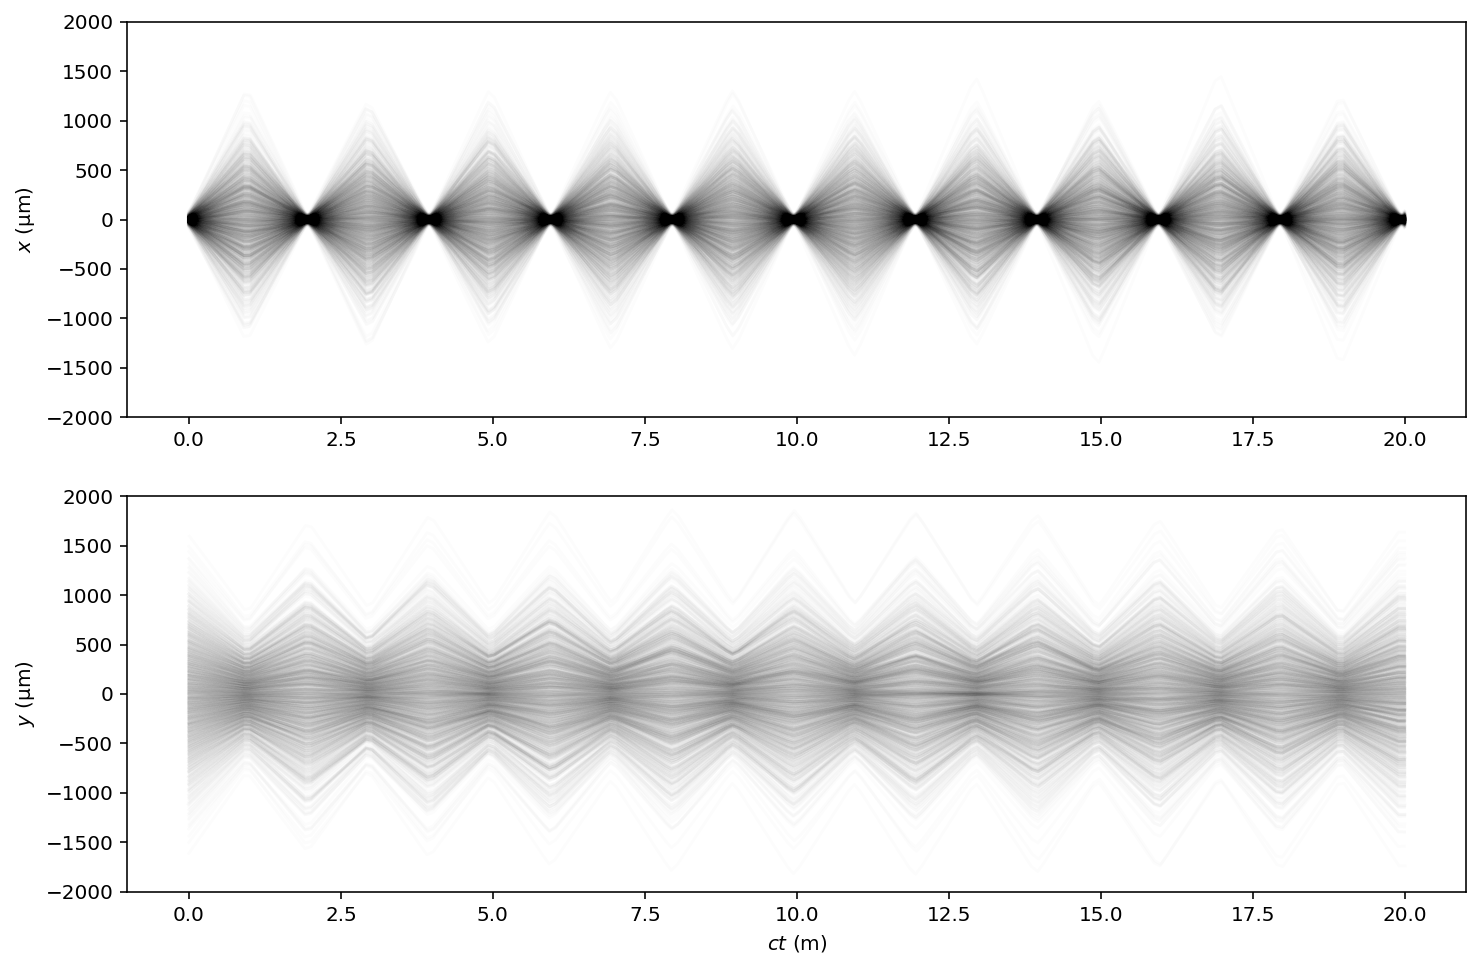

In [30]:

skip = 1 # make larger for faster plotting
fig, axes = plt.subplots(2, figsize=(12,8))

axes[0].plot(
    [P.t[::skip]*299792458 for P in  Plist],
    [P.x[::skip]*1e6 for P in  Plist],
    alpha=0.01, color='black'
)

axes[1].plot(
    [P.t[::skip]*299792458 for P in  Plist],
    [P.y[::skip]*1e6 for P in  Plist],
    alpha=0.01, color='black'
)

axes[0].set_ylabel(r'$x$ (µm)')
axes[1].set_ylabel(r'$y$ (µm)')

axes[1].set_xlabel(r'$ct$ (m)')

for ax in axes:
    ax.set_ylim(-2000,2000)

## Get some statistics

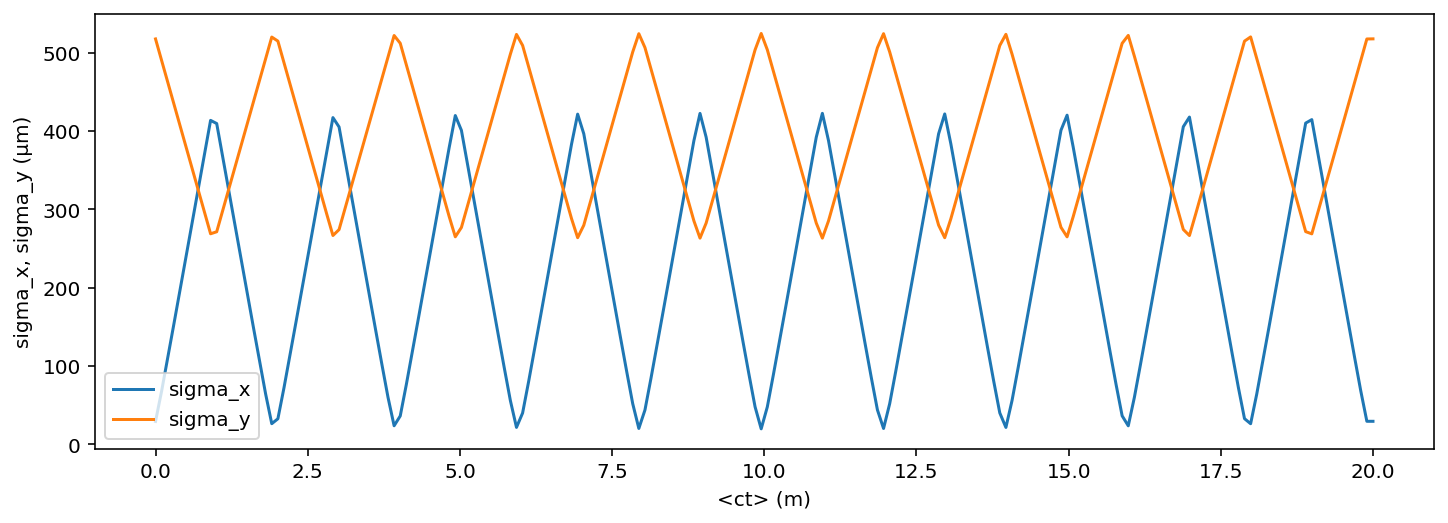

In [31]:
k1 = 'sigma_x'
k2 = 'sigma_y'

x =  np.array([P['mean_t']*299792458 for P in Plist])
y1 = np.array([P[k1] for P in Plist])
y2 = np.array([P[k2] for P in Plist])

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, y1*1e6, label=k1)
ax.plot(x, y2*1e6, label=k2)
ax.set_xlabel('<ct> (m)')
ax.set_ylabel(f'{k1}, {k2} (µm)')
plt.legend()

## Cleanup

In [32]:
# Cleanup
!rm beam_dump.h5
!rm {latfile}
!rm markers.bmad